In [ ]:
!git clone https://github.com/misbah4064/face_recognition.git

Cloning into 'face_recognition'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 26 (delta 5), reused 23 (delta 3), pack-reused 0
Unpacking objects: 100% (26/26), done.


In [ ]:
%cd /content/face_recognition

/content/face_recognition


In [ ]:
!pip install face_recognition

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100.1 MB 25 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566186 sha256=b7a2bdc20127e80e1db952d96a37b0fd4c5da522ab3018d9c3509b1799393eac
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models


In [ ]:
import imutils
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

In [ ]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);

      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
image_file = take_photo()

<IPython.core.display.Javascript object>

In [ ]:
#image = cv2.imread(image_file, cv2.IMREAD_UNCHANGED)
image = cv2.imread(image_file)

# resize it to have a maximum width of 400 pixels
image = imutils.resize(image, width=400)
(h, w) = image.shape[:2]
print(w,h)
cv2_imshow(image)

In [ ]:
!wget -N https://raw.githubusercontent.com/opencv/opencv/master/samples/dnn/face_detector/deploy.prototxt
!wget -N https://raw.githubusercontent.com/opencv/opencv_3rdparty/dnn_samples_face_detector_20170830/res10_300x300_ssd_iter_140000.caffemodel

--2022-08-26 04:30:39--  https://raw.githubusercontent.com/opencv/opencv/master/samples/dnn/face_detector/deploy.prototxt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28104 (27K) [text/plain]
Saving to: ‘deploy.prototxt’

deploy.prototxt     100%[===================>]  27.45K  --.-KB/s    in 0.001s  

Last-modified header missing -- time-stamps turned off.
2022-08-26 04:30:39 (22.0 MB/s) - ‘deploy.prototxt’ saved [28104/28104]

--2022-08-26 04:30:39--  https://raw.githubusercontent.com/opencv/opencv_3rdparty/dnn_samples_face_detector_20170830/res10_300x300_ssd_iter_140000.caffemodel
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubus

In [ ]:
print("[INFO] loading model...")
prototxt = 'deploy.prototxt'
model = 'res10_300x300_ssd_iter_140000.caffemodel'
net = cv2.dnn.readNetFromCaffe(prototxt, model)

[INFO] loading model...


In [ ]:
# resize it to have a maximum width of 400 pixels
image = imutils.resize(image, width=400)
blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 1.0, (300, 300), (104.0, 177.0, 123.0))

In [ ]:
print("[INFO] computing object detections...")
net.setInput(blob)
detections = net.forward()

[INFO] computing object detections...


In [ ]:
for i in range(0, detections.shape[2]):

    # extract the confidence (i.e., probability) associated with the prediction
    confidence = detections[0, 0, i, 2]

    # filter out weak detections by ensuring the `confidence` is
    # greater than the minimum confidence threshold
    if confidence > 0.5:
        # compute the (x, y)-coordinates of the bounding box for the object
        box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
        (startX, startY, endX, endY) = box.astype("int")
        # draw the bounding box of the face along with the associated probability
        text = "{:.2f}%".format(confidence * 100)
        y = startY - 10 if startY - 10 > 10 else startY + 10
        cv2.rectangle(image, (startX, startY), (endX, endY), (0, 0, 255), 2)
        cv2.putText(image, text, (startX, y),
            cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)

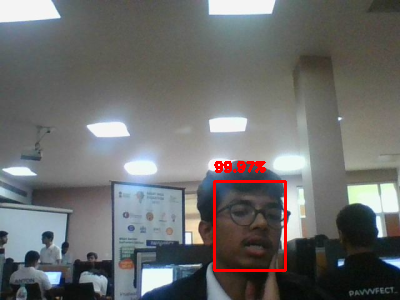

In [ ]:
cv2_imshow(image)

# **Training Images**

In [ ]:
import face_recognition
import numpy as np
from PIL import Image, ImageDraw
from IPython.display import display
from google.colab.patches import cv2_imshow
import cv2
from datetime import datetime

face_1 = face_recognition.load_image_file("/content/face_recognition/ertugrul.jpeg")
face_1_encoding = face_recognition.face_encodings(face_1)[0]

# face_2 = face_recognition.load_image_file("/content/elon.jpeg")
# face_2_encoding = face_recognition.face_encodings(face_2)[0]

# face_3 = face_recognition.load_image_file("/content/farhan.jpeg")
# face_3_encoding = face_recognition.face_encodings(face_3)[0]


# face_4 = face_recognition.load_image_file("/content/zaid.jpeg")
# face_4_encoding = face_recognition.face_encodings(face_4)[0]



# face_6 = face_recognition.load_image_file("/content/happy boy.jpg")
# face_6_encoding = face_recognition.face_encodings(face_6)[0]

#face_7 = face_recognition.load_image_file("/content/face_recognition/naseer.jpeg")
#face_7_encoding = face_recognition.face_encodings(face_7)[0]

known_face_encodings = [
    face_1_encoding
    # face_2_encoding,
    # face_3_encoding,
    # face_4_encoding
    #face_6_encoding
    #face_7_encoding
]
known_face_names = [
    "Sunrend"

    #"nadeeem"
    #"mohd naseer"
]
print("Done learning and creating profiles")

# **Initializing function to add names to the "attendance_list.csv" file**

In [ ]:
def makeAttendanceEntry(name):
    with open('/content/face_recognition/attendance_list.csv','r+') as File:
        allLines = File.readlines()
        attendanceList = []
        for line in allLines:
            entry = line.split(',')
            attendanceList.append(entry[0])
        if name not in attendanceList:
            now = datetime.now()
            dtString = now.strftime('%H:%M:%S')
            File.writelines(f'\n{name} ,{dtString}')

# **Performing Face Recognition and Entering Attendance with time-stamp**

In [ ]:
file_name = "/content/face_recognition/unknown_do.jpg"
unknown_image = face_recognition.load_image_file(file_name)
unknown_image_to_draw = cv2.imread(file_name)

face_locations = face_recognition.face_locations(unknown_image)
face_encodings = face_recognition.face_encodings(unknown_image, face_locations)

pil_image = Image.fromarray(unknown_image)
draw = ImageDraw.Draw(pil_image)

for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
    # See if the face is a match for the known face(s)
    matches = face_recognition.compare_faces(known_face_encodings, face_encoding)

    name = "Unknown"

    face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
    best_match_index = np.argmin(face_distances)
    if matches[best_match_index]:
        name = known_face_names[best_match_index]

    # Draw a box around the face using the Pillow module
    cv2.rectangle(unknown_image_to_draw,(left, top), (right, bottom), (0,255,0),3 )
    draw.rectangle(((left, top), (right, bottom)), outline=(0, 255, 255))
    cv2.putText(unknown_image_to_draw,name,(left,top-20), cv2.FONT_HERSHEY_SIMPLEX,1, (0,0,255), 2,cv2.LINE_AA)
    print(name)
    makeAttendanceEntry(name)

# display(pil_image)
cv2_imshow(unknown_image_to_draw)

In [ ]:
file_name ='/content/face_recognition/unknown_er.jpg'
unknown_image = face_recognition.load_image_file(file_name)
unknown_image_to_draw = cv2.imread(file_name)

face_locations = face_recognition.face_locations(unknown_image)
face_encodings = face_recognition.face_encodings(unknown_image, face_locations)

pil_image = Image.fromarray(unknown_image)
draw = ImageDraw.Draw(pil_image)

for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
    # See if the face is a match for the known face(s)
    matches = face_recognition.compare_faces(known_face_encodings, face_encoding)

    name = "Unknown"

    face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
    best_match_index = np.argmin(face_distances)
    if matches[best_match_index]:
        name = known_face_names[best_match_index]

    # Draw a box around the face using the Pillow module
    cv2.rectangle(unknown_image_to_draw,(left, top), (right, bottom), (0,255,0),3 )
    draw.rectangle(((left, top), (right, bottom)), outline=(0, 255, 255))
    cv2.putText(unknown_image_to_draw,name,(left,top-20), cv2.FONT_HERSHEY_SIMPLEX,1, (0,0,255), 2,cv2.LINE_AA)
    print(name)
    makeAttendanceEntry(name)

# display(pil_image)
cv2_imshow(unknown_image_to_draw)

In [ ]:
file_name ='/content/face_recognition/unkown_je.jpg'
unknown_image = face_recognition.load_image_file(file_name)
unknown_image_to_draw = cv2.imread(file_name)

face_locations = face_recognition.face_locations(unknown_image)
face_encodings = face_recognition.face_encodings(unknown_image, face_locations)

pil_image = Image.fromarray(unknown_image)
draw = ImageDraw.Draw(pil_image)

for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
    # See if the face is a match for the known face(s)
    matches = face_recognition.compare_faces(known_face_encodings, face_encoding)

    name = "Unknown"

    face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
    best_match_index = np.argmin(face_distances)
    if matches[best_match_index]:
        name = known_face_names[best_match_index]

    # Draw a box around the face using the Pillow module
    cv2.rectangle(unknown_image_to_draw,(left, top), (right, bottom), (0,255,0),3 )
    draw.rectangle(((left, top), (right, bottom)), outline=(0, 255, 255))
    cv2.putText(unknown_image_to_draw,name,(left,top-20), cv2.FONT_HERSHEY_SIMPLEX,1, (0,0,255), 2,cv2.LINE_AA)
    print(name)
    #makeAttendanceEntry(name)

# display(pil_image)
cv2_imshow(unknown_image_to_draw)

In [ ]:
file_name ='/content/face_recognition/unknown_el.jpg'
unknown_image = face_recognition.load_image_file(file_name)
unknown_image_to_draw = cv2.imread(file_name)

face_locations = face_recognition.face_locations(unknown_image)
face_encodings = face_recognition.face_encodings(unknown_image, face_locations)

pil_image = Image.fromarray(unknown_image)
draw = ImageDraw.Draw(pil_image)

for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
    # See if the face is a match for the known face(s)
    matches = face_recognition.compare_faces(known_face_encodings, face_encoding)

    name = "Unknown"

    face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
    best_match_index = np.argmin(face_distances)
    if matches[best_match_index]:
        name = known_face_names[best_match_index]

    # Draw a box around the face using the Pillow module
    cv2.rectangle(unknown_image_to_draw,(left, top), (right, bottom), (0,255,0),3 )
    draw.rectangle(((left, top), (right, bottom)), outline=(0, 255, 255))
    cv2.putText(unknown_image_to_draw,name,(left,top-20), cv2.FONT_HERSHEY_SIMPLEX,1, (0,0,255), 2,cv2.LINE_AA)
    print(name)
    #makeAttendanceEntry(name)

# display(pil_image)
cv2_imshow(unknown_image_to_draw)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
file_name ='/content/naseer1.jpeg'
unknown_image = face_recognition.load_image_file(file_name)
unknown_image_to_draw = cv2.imread(file_name)

face_locations = face_recognition.face_locations(unknown_image)
face_encodings = face_recognition.face_encodings(unknown_image, face_locations)

pil_image = Image.fromarray(unknown_image)
draw = ImageDraw.Draw(pil_image)

for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
    # See if the face is a match for the known face(s)
    matches = face_recognition.compare_faces(known_face_encodings, face_encoding)

    name = "Unknown"

    face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
    best_match_index = np.argmin(face_distances)
    if matches[best_match_index]:
        name = known_face_names[best_match_index]

    # Draw a box around the face using the Pillow module
    cv2.rectangle(unknown_image_to_draw,(left, top), (right, bottom), (0,255,0),3 )
    draw.rectangle(((left, top), (right, bottom)), outline=(0, 255, 255))
    cv2.putText(unknown_image_to_draw,name,(left,top-20), cv2.FONT_HERSHEY_SIMPLEX,1, (0,0,255), 2,cv2.LINE_AA)
    print(name)
    #makeAttendanceEntry(name)

# display(pil_image)
cv2_imshow(unknown_image_to_draw)

In [ ]:
file_name ='/content/face_recognition/naseer.jpeg'
unknown_image = face_recognition.load_image_file(file_name)
unknown_image_to_draw = cv2.imread(file_name)

face_locations = face_recognition.face_locations(unknown_image)
face_encodings = face_recognition.face_encodings(unknown_image, face_locations)

pil_image = Image.fromarray(unknown_image)
draw = ImageDraw.Draw(pil_image)

for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
    # See if the face is a match for the known face(s)
    matches = face_recognition.compare_faces(known_face_encodings, face_encoding)

    name = "Unknown"

    face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
    best_match_index = np.argmin(face_distances)
    if matches[best_match_index]:
        name = known_face_names[best_match_index]

    # Draw a box around the face using the Pillow module
    cv2.rectangle(unknown_image_to_draw,(left, top), (right, bottom), (0,255,0),3 )
    draw.rectangle(((left, top), (right, bottom)), outline=(0, 255, 255))
    cv2.putText(unknown_image_to_draw,name,(left,top-20), cv2.FONT_HERSHEY_SIMPLEX,1, (0,0,255), 2,cv2.LINE_AA)
    print(name)
    #makeAttendanceEntry(name)

# display(pil_image)
cv2_imshow(unknown_image_to_draw)